## Import Libraries

In [23]:
# ! pip install matplotlib

In [24]:
# ! pip install scikit-learn

In [25]:
# Import Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Import numpy for np.sqrt
import joblib # For saving/loading models

print("Libraries imported successfully.")

Libraries imported successfully.


## Load RFM Features

In [26]:
# Load RFM Features
# Define the path to your RFM features file in the 'data' folder.
# Since this notebook is in the 'models' folder, you need to go up one level (..)
# to the project root, then down into the 'data' folder.
data_folder = '../data'
rfm_file_name = 'rfm_features_enhanced.xlsx'
rfm_file_path = os.path.join(data_folder, rfm_file_name)

print(f"Loading RFM features from: {rfm_file_path}")

# Load the RFM DataFrame
rfm_df = pd.read_excel(rfm_file_path)

print(f"RFM features loaded. Shape: {rfm_df.shape}")
print("First 5 rows of RFM data:")
display(rfm_df.head())
print("\nRFM Data Info:")
rfm_df.info()
print("\nDescriptive statistics of RFM data:")
display(rfm_df.describe())

Loading RFM features from: ../data\rfm_features_enhanced.xlsx
RFM features loaded. Shape: (5878, 48)
First 5 rows of RFM data:


,Customer ID,Recency,Frequency,Monetary,AOV,Tenure,UniqueProducts,Country_Australia,Country_Austria,Country_Bahrain,...,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Country_West Indies
0,12346,326,12,77556.46,6463.038333,726,27,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,12347,2,8,4921.53,615.191250,404,126,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348,75,5,2019.40,403.880000,438,25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349,19,4,4428.69,1107.172500,589,138,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350,310,1,334.40,334.400000,310,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0



RFM Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5878 entries, 0 to 5877
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   5878 non-null   int64  
 1   Recency                       5878 non-null   int64  
 2   Frequency                     5878 non-null   int64  
 3   Monetary                      5878 non-null   float64
 4   AOV                           5878 non-null   float64
 5   Tenure                        5878 non-null   int64  
 6   UniqueProducts                5878 non-null   int64  
 7   Country_Australia             5878 non-null   int64  
 8   Country_Austria               5878 non-null   int64  
 9   Country_Bahrain               5878 non-null   int64  
 10  Country_Belgium               5878 non-null   int64  
 11  Country_Brazil                5878 non-null   int64  
 12  Country_Canada                5878 non-null   

,Customer ID,Recency,Frequency,Monetary,AOV,Tenure,UniqueProducts,Country_Australia,Country_Austria,Country_Bahrain,...,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Country_West Indies
count,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,...,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000,5878.000000
mean,15315.313542,201.331916,6.289384,2955.904095,385.180841,474.711637,81.989112,0.002552,0.001871,0.000340,...,0.000170,0.006635,0.003232,0.003403,0.000170,0.001531,0.000681,0.910174,0.001021,0.000170
std,1715.572666,209.338707,13.009406,14440.852688,1214.286459,223.098342,116.484552,0.050456,0.043223,0.018444,...,0.013043,0.081191,0.056767,0.058237,0.013043,0.039103,0.026080,0.285957,0.031936,0.013043
min,12346.000000,1.000000,1.000000,2.950000,2.950000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13833.250000,26.000000,1.000000,342.280000,176.682500,313.000000,19.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,15314.500000,96.000000,3.000000,867.740000,279.242679,530.000000,45.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16797.750000,380.000000,7.000000,2248.305000,414.902458,668.000000,103.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,18287.000000,739.000000,398.000000,580987.040000,84236.250000,739.000000,2550.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Define Target Variable (CLTV Proxy) and Features

In [27]:
#  Define Target Variable (CLTV Proxy) and Features

target = 'Monetary'

# IMPORTANT: Include all the new features along with Recency and Frequency
features = [
    'Recency',
    'Frequency',
    'AOV',            # New Feature
    'Tenure',         # New Feature
    'UniqueProducts'  # New Feature
]

# Dynamically add all one-hot encoded country columns
# We need to exclude 'CustomerID', 'Monetary', 'Recency', 'Frequency', 'AOV', 'Tenure', 'UniqueProducts'
# from the columns to get the country columns.
# It's safer to get all columns that start with 'Country_'
country_features = [col for col in rfm_df.columns if col.startswith('Country_')]
features.extend(country_features)

print(f"Features selected for modeling: {features}")

X = rfm_df[features]
y = rfm_df[target]

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print("\nFirst 5 rows of features (X):")
display(X.head())
print("\nFirst 5 rows of target (y):")
display(y.head())

Features selected for modeling: ['Recency', 'Frequency', 'AOV', 'Tenure', 'UniqueProducts', 'Country_Australia', 'Country_Austria', 'Country_Bahrain', 'Country_Belgium', 'Country_Brazil', 'Country_Canada', 'Country_Channel Islands', 'Country_Cyprus', 'Country_Czech Republic', 'Country_Denmark', 'Country_EIRE', 'Country_European Community', 'Country_Finland', 'Country_France', 'Country_Germany', 'Country_Greece', 'Country_Iceland', 'Country_Israel', 'Country_Italy', 'Country_Japan', 'Country_Korea', 'Country_Lebanon', 'Country_Lithuania', 'Country_Malta', 'Country_Netherlands', 'Country_Nigeria', 'Country_Norway', 'Country_Poland', 'Country_Portugal', 'Country_RSA', 'Country_Saudi Arabia', 'Country_Singapore', 'Country_Spain', 'Country_Sweden', 'Country_Switzerland', 'Country_Thailand', 'Country_USA', 'Country_United Arab Emirates', 'Country_United Kingdom', 'Country_Unspecified', 'Country_West Indies']
Features (X) shape: (5878, 46)
Target (y) shape: (5878,)

First 5 rows of features (

,Recency,Frequency,AOV,Tenure,UniqueProducts,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,...,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Country_West Indies
0,326,12,6463.038333,726,27,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,8,615.191250,404,126,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,75,5,403.880000,438,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19,4,1107.172500,589,138,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,310,1,334.400000,310,17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



First 5 rows of target (y):


0    77556.46
1     4921.53
2     2019.40
3     4428.69
4      334.40
Name: Monetary, dtype: float64

## Split Data into Training and Testing Sets

In [28]:
# Split Data into Training and Testing Sets
# Split the data into training and testing sets (e.g., 80% train, 20% test)
# random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training features (X_train) shape: {X_train.shape}")
print(f"Testing features (X_test) shape: {X_test.shape}")
print(f"Training target (y_train) shape: {y_train.shape}")
print(f"Testing target (y_test) shape: {y_test.shape}")

Training features (X_train) shape: (4702, 46)
Testing features (X_test) shape: (1176, 46)
Training target (y_train) shape: (4702,)
Testing target (y_test) shape: (1176,)


In [29]:
#  Standardize Features
# It's crucial to fit the scaler ONLY on the training data and then transform both
# training and testing data to prevent data leakage.
from sklearn.preprocessing import StandardScaler # This is the crucial line for StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features standardized successfully.")
print("\nShape of scaled training features:", X_train_scaled.shape)
print("Shape of scaled testing features:", X_test_scaled.shape)
print("First 5 rows of scaled training features (X_train_scaled):")
print(X_train_scaled[:5])

# You should also save this scaler if you plan to use the model for new, unseen data,
# as new data would also need to be scaled using the *same* scaler.
# For now, we'll proceed with saving the model, and we can discuss saving the scaler later.

Features standardized successfully.

Shape of scaled training features: (4702, 46)
Shape of scaled testing features: (1176, 46)
First 5 rows of scaled training features (X_train_scaled):
[[-0.52935108 -0.10007131 -0.08534577  0.0345183   0.08446623 -0.05265402
  -0.03574469 -0.02062842 -0.0701112  -0.02062842 -0.02917921 -0.05058296
  -0.04128321 -0.01458495 -0.03861279 -0.02526725  0.         -0.05058296
  -0.12817519 -0.12987884 -0.02917921 -0.01458495 -0.02526725 -0.05058296
  -0.04128321 -0.02062842  0.         -0.01458495 -0.02062842 -0.05843309
  -0.01458495 -0.05265402 -0.03262682 -0.05843309 -0.02062842 -0.01458495
  -0.01458495 -0.0801326  -0.05657156 -0.05657156 -0.01458495 -0.03861279
  -0.02526725  0.30989885 -0.03262682 -0.01458495]
 [-0.83111704 -0.32563951 -0.04928679 -1.8222295  -0.42862804 -0.05265402
  -0.03574469 -0.02062842 -0.0701112  -0.02062842 -0.02917921 -0.05058296
  -0.04128321 -0.01458495 -0.03861279 -0.02526725  0.         -0.05058296
  -0.12817519 -0.12987

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [31]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [32]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25,12,19,18,17],
    'max_features':['auto','sqrt','log2']
}

In [33]:
param

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25, 12, 19, 18, 17],
 'max_features': ['auto', 'sqrt', 'log2']}

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
regressor=DecisionTreeRegressor()

In [36]:
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')
## we do not take score as accuracy because it is a regression problem

In [37]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'friedman_mse'


In [38]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 15,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [39]:
## predictions
y_pred=grid.predict(X_test)

In [40]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [41]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.16500127862705294
1803.55277463847
303213981.76189053


In [42]:
selectedmodel=DecisionTreeRegressor(criterion='absolute_error',max_depth=12,max_features='log2',splitter='random')

In [43]:
selectedmodel.fit(X_train,y_train)

,criterion,'absolute_error'
,splitter,'random'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.6880023786089239, 0.9615384615384616, 'x[0] <= 75.616\nabsolute_error = 2547.232\nsamples = 4702\nvalue = 901.73'),
 Text(0.4258735236220472, 0.8846153846153846, 'x[3] <= 510.221\nabsolute_error = 4160.765\nsamples = 2148\nvalue = 1731.035'),
 Text(0.5569379511154855, 0.9230769230769231, 'True  '),
 Text(0.17093175853018372, 0.8076923076923077, 'x[6] <= 0.194\nabsolute_error = 1654.656\nsamples = 1101\nvalue = 915.13'),
 Text(0.16568241469816272, 0.7307692307692307, 'x[2] <= 64044.052\nabsolute_error = 1653.971\nsamples = 1100\nvalue = 913.655'),
 Text(0.16043307086614172, 0.6538461538461539, 'x[39] <= 0.813\nabsolute_error = 1503.009\nsamples = 1099\nvalue = 912.18'),
 Text(0.12139107611548557, 0.5769230769230769, 'x[5] <= 0.76\nabsolute_error = 1488.92\nsamples = 1094\nvalue = 906.64'),
 Text(0.11614173228346457, 0.5, 'x[4] <= 354.65\nabsolute_error = 1488.912\nsamples = 1093\nvalue = 902.02'),
 Text(0.07349081364829396, 0.4230769230769231, 'x[2] <= 2587.024\nabsolute_error =

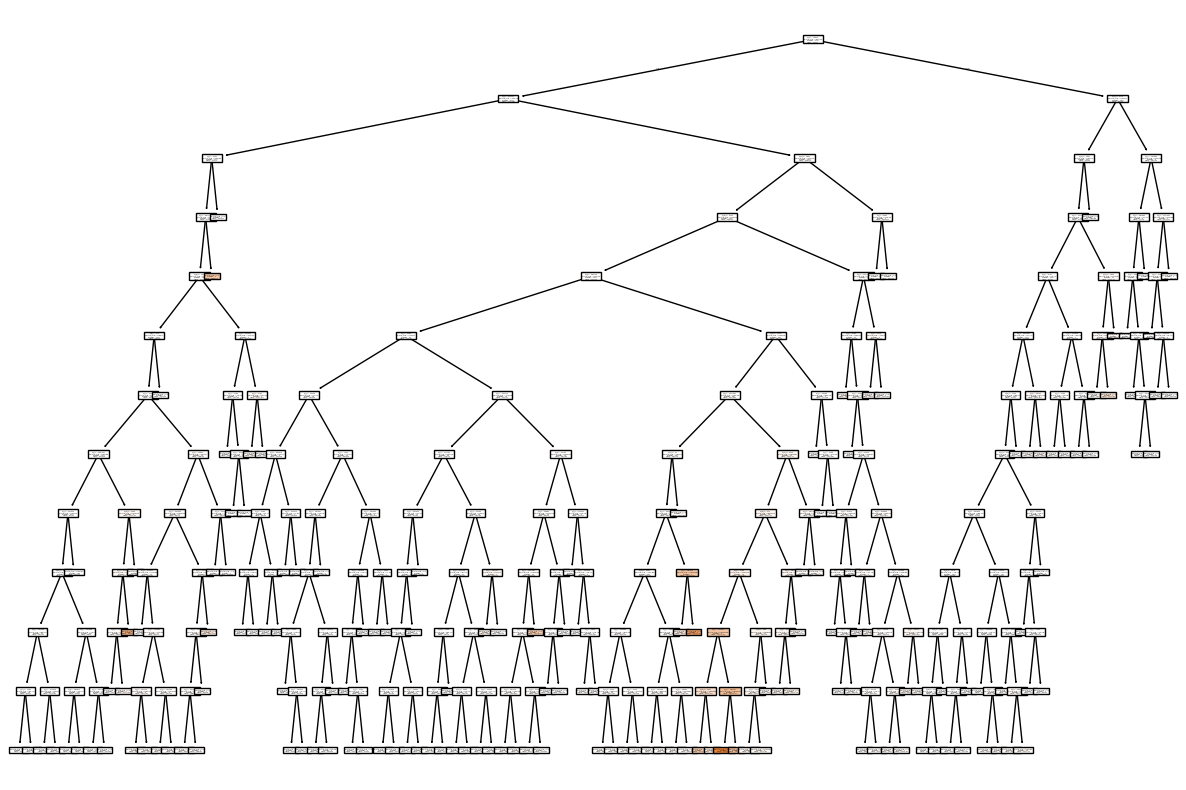

In [44]:
##Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)